# Logistic Regression

 
Learning  Task  1:  Build  a  classification  model  (LR1)  using  Logistic  Regression.  What  happens  to 
testing accuracy when you vary the  decision  probability threshold  from  0.5 to 0.3, 0.4,  0.6 and 
0.7.  

Learning  Task  2:  You  should  apply  Feature  Engineering  Task  1  and  Feature  Engineering  Task  2 
and  then  build  a  classification  model  (LR2)  using  Logistic  Regression.  What  happens  to  testing 
accuracy when you vary the decision probability threshold from 0.5 to 0.3, 0.4, 0.6 and 0.7.  
 
You  must  implement  the  above  two  learning  tasks  using  Batch  Gradient  Descent,  Mini-batch 
Gradient Descent and Stochastic Gradient Descent using learning rates 0.01, 0.001 and 0.0001. 
Plot the learning curves (Cost Function vs Iterations) for the same

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.utils_ml import generate_confusion_matrix

## Importing the dataset

In [2]:
dataset = pd.read_csv('../dataset.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Convert cancer type into a new column
dataset["cancer_type"] = pd.factorize(dataset["diagnosis"])[0]
dataset.head()

# Malignant is 0 and Benign is 1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cancer_type
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Remove ID and diagnosis from the dataset
dataset.drop(['id', 'diagnosis'], axis=1, inplace=True)

# Drop NA rows because in first one we shouldn't use NA
dropped_dataset = dataset.dropna()

print(dropped_dataset[dropped_dataset.isna().any(axis=1)])
print(dropped_dataset.head())

Empty DataFrame
Columns: [radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, cancer_type]
Index: []

[0 rows x 31 columns]
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0        

# Logistic Regression Class

In [14]:
class LogReg():
    def __init__(self, dataset, is_feature_engineered = 0):
        # Initializing the dataset
        self.dataset = dataset        
        
        if is_feature_engineered == 1:
            self.dataset = self.dataset.fillna(dataset.mean(numeric_only=True))

        # Splitting training and testing datasets
        self.training_dataset = self.dataset.iloc[:int(
            0.67*self.dataset.shape[0]), :]
        self.testing_dataset = self.dataset.iloc[int(
            0.67*self.dataset.shape[0]):, :]
        
        if is_feature_engineered == 1:
            mean = self.training_dataset.iloc[:, :-1].mean(numeric_only=True)
            std = self.training_dataset.iloc[:, :-1].std()
            self.training_dataset.iloc[:, :-1] = (self.training_dataset.iloc[:, :-1] - mean)/std
            self.testing_dataset.iloc[:, :-1] = (self.testing_dataset.iloc[:, :-1] - mean)/std 

        
        # Defining separate w matrices for each gradient type        
        self.batch_w = np.zeros((self.training_dataset.shape[1] - 1, 1))
        self.mini_batch_w = np.zeros((self.training_dataset.shape[1] - 1, 1))
        self.stochastic_w = np.zeros((self.training_dataset.shape[1] - 1, 1))

        # Split data into train and test
        self.X_train = self.training_dataset.iloc[:, :-1].values
        self.y_train = self.training_dataset.iloc[:, -1].values
        self.X_test = self.testing_dataset.iloc[:, :-1].values
        self.y_test = self.testing_dataset.iloc[:, -1].values
        
        # Definish separate lists to store cost histories
        self.batch_cost_history = []
        self.mini_batch_cost_history = []
        self.stochastic_cost_history = []

        # A small value added to prevent the argument in the log() from being 0
        self.epsilon = 1e-100

    # Sigmoid function
    def get_sigmoid_value(self, z):
        if z >= 0:
            sig = (1/(1+np.exp(-z)))
        else:
            sig = (np.exp(z)/(1+np.exp(z)))
        # print(f"z: {z}, Value: {sig}")
        return sig

    # Batch Gradient Descent
    def batch_gradient_descent(self, target_values, input_values, learning_rate):
        # Make an array of true values
        y_true = target_values.reshape(target_values.shape[0], 1)      

        # Make an array to store predicted values
        y_pred = []

        # Iterating thorough all the samples in the training dataset
        for x in input_values:
            y_pred.append(self.get_sigmoid_value(
                np.matmul(self.batch_w.T, x.reshape(30, 1))[0][0]))
            
        y_pred = np.array(y_pred)

        # An array for differences
        difference = []
        difference = y_pred.reshape(y_pred.shape[0], 1) - y_true

        # Making a matrix to store the gradient values
        batch_grad = np.zeros((30, 1))

        # Iterating through the samples in training dataset the batch gradient
        for index, x in enumerate(input_values):
            batch_grad += (difference[index][0])*(x.reshape(30, 1))

        cost_history = []
        # Updating the batch_w matrix 
        self.batch_w -= learning_rate*batch_grad
        cost_history.append(self.cost_function(
            input_value=input_values, target_value=target_values, w=self.batch_w)/377)
        self.batch_cost_history += cost_history
        return self.batch_w

    # Batch Training Function
    def batch_train(self, lr, epochs):
        # We make it loop over epochs
        self.batch_cost_history = []
        for _ in range(epochs):
            # Find gradient and get the updated batch_w
            self.batch_w = self.batch_gradient_descent(target_values=self.y_train, input_values=self.X_train, learning_rate=lr)
        

        # iterations = []
        # iterations = [i for i in range(1, epochs+1)]
        # print(f"{self.batch_cost_history=}, {iterations=}")
        # plt.plot(iterations, self.batch_cost_history)
        # plt.show()
            
    # Mini Batch Gradient Descent
    def mini_batch_gradient_descent(self, target_values, input_values, batch_size, learning_rate):
        # Make an array of true values
        y_true = target_values.reshape(target_values.shape[0], 1)
        
        # Making a matrix to store the gradient values
        mini_batch_grad = np.zeros((self.training_dataset.shape[1] - 1, 1))

        cost_history = []
        # Defining a variable to store the cost in this epoch
        iter_cost = 0

        # Iterating through each sample in the training dataset to calculate the mini batch gradient
        for index, x in enumerate(input_values):
            y_pred = self.get_sigmoid_value(
                np.matmul(self.mini_batch_w.T, x.reshape(self.training_dataset.shape[1] - 1, 1))[0][0])
            difference = y_pred - y_true[index][0]
            # Making a matrix to store the mini batch gradient values
            mini_batch_grad += difference*(x.reshape(30, 1))
            if index % batch_size == 0 and index <= self.training_dataset.shape[0]//batch_size:
                self.mini_batch_w -= learning_rate*mini_batch_grad
                iter_cost += self.cost_function(
                    input_value=input_values, target_value=target_values, w=self.mini_batch_w)/37
            elif index == len(input_values)-1:
                self.mini_batch_w -= learning_rate*mini_batch_grad
                iter_cost += self.cost_function(
                    input_values, target_values, self.mini_batch_w)/37
            
        self.mini_batch_cost_history.append(iter_cost)
        return self.mini_batch_w       
    
    # Mini Batch Training Function
    def mini_batch_train(self, lr, epochs):
        self.mini_batch_cost_history = []
        for _ in range(epochs):
            self.mini_batch_w = self.mini_batch_gradient_descent(
                target_values=self.y_train, input_values=self.X_train, learning_rate=lr, batch_size=10)
        
        # iterations = []
        # iterations = [i for i in range(1, epochs+1)]
        # print(f"{self.batch_cost_history=}, {iterations=}")
        # plt.plot(iterations, self.mini_batch_cost_history)
        # plt.show()
    
    # Stochastic Gradient Descent
    def stochastic_gradient_descent(self, target_values, input_values, learning_rate):
        y_true = target_values.reshape(target_values.shape[0], 1)
        cost_history = []
        # Defining a variable to store the cost in this epoch
        iter_cost = 0
        
        for index, x in enumerate(input_values):
            y_pred = self.get_sigmoid_value(
                np.matmul(self.stochastic_w.T, x.reshape(self.training_dataset.shape[1] - 1, 1))[0][0])
            difference = y_pred - y_true[index][0]
            stochastic_grad = difference*(x.reshape(30, 1))
            self.stochastic_w -= learning_rate*stochastic_grad
            iter_cost += self.cost_function(
                input_value=input_values,target_value=target_values,w=self.stochastic_w)
        self.stochastic_cost_history.append(iter_cost)
        return self.stochastic_w

    # Stochastic Training Function
    def stochastic_train(self, lr, epochs):
        self.stochastic_cost_history = []
        for _ in range(epochs):
            self.stochastic_w = self.stochastic_gradient_descent(
                target_values=self.y_train, input_values=self.X_train, learning_rate=lr)
            
        # iterations = []
        # iterations = [i for i in range(1, epochs+1)]
        # print(f"{self.batch_cost_history=}, {iterations=}")
        # plt.plot(iterations, self.stochastic_cost_history)
        # plt.show()
    
    # Predict function
    def predict(self, x_input, descent_type, thresh):
        if(descent_type == "Batch"):
                w = self.batch_w        
        elif(descent_type == "Mini-Batch"):
            w = self.mini_batch_w
        elif(descent_type == "Stochastic"):
                w = self.stochastic_w
        
        # Here input should be the column vector with 30rows and 1 column
        return 1 if self.get_sigmoid_value(np.matmul(w.T, x_input.reshape(30, 1))[0][0]) > thresh else 0
    
    def cost_function(self, input_value, target_value, w):
        y_true = target_value.reshape(target_value.shape[0], 1)
        cost = 0
        for index, x in enumerate(input_value):
            y_t = y_true[index][0]
            pred = self.get_sigmoid_value(
                np.matmul(w.T, x.reshape(30, 1))[0][0])
            # print(f"{pred=}")
            cost += -(y_t * np.log(pred + self.epsilon) +
                      (1-y_t)*np.log(1-pred + self.epsilon))
        
        
        return cost

    # Function to check training accuracy
    # This function does not have any arguments
    def check_training_accuracy(self, descent_type, thresh):
        # Making an array to store the predicted values
        y_pred = []
        for x in self.X_train:
            y_pred.append(self.predict(x, descent_type, thresh))
        # print(y_pred)
        # print(self.y_test)
        # print(len(y_pred))
        # print(type(y_pred))
        return generate_confusion_matrix(y_pred=np.array(y_pred), y_true=self.y_train)[0]

    # Function to check testing accuracy
    def check_testing_accuracy(self, descent_type, thresh):
        
        # Making an array to store the predicted values
        y_pred = []
        for x in self.X_test:
            y_pred.append(self.predict(x, descent_type, thresh))
        # print(y_pred)
        self.y_test_pred = y_pred
        # print(accuracy_score(y_pred=y_pred, y_true=self.y_test))
        return generate_confusion_matrix(y_pred=np.array(y_pred), y_true=self.y_test)[0]

    # Confusion Matrix Function
    def show_confusion_matrix(self):
        cm = generate_confusion_matrix(y_true=(self.y_test), y_pred=np.array(self.y_test_pred))

        accuracy = cm[0]
        precision = cm[1]
        recall = cm[2]
        f1 = cm[3]
        
        return accuracy, precision, f1, recall

    def run_all_permutations(self, descents, thresholds, learning_rates, epochs, showGraph):
        iterations = []
        iterations = [i for i in range(1, epochs+1)]
        data_for_permutations = np.zeros((45, 5))
        counter = 0
        for d in descents:
            for lr in learning_rates:
                for t in thresholds:  
                    if showGraph:
                        plt.title(f'Descent={d},LearningRate={lr},Threshold={t}')
                    if(d == "Batch"):
                        self.batch_train(lr, epochs)
                        if showGraph:
                            plt.plot(iterations, self.batch_cost_history)
                            plt.xlabel('Iterations')
                            plt.ylabel('Cost Function')                        
                            plt.show()
                    elif(d == "Mini-Batch"):
                        self.mini_batch_train(lr, epochs)
                        if showGraph:
                            plt.plot(iterations, self.mini_batch_cost_history)
                            plt.xlabel('Iterations')
                            plt.ylabel('Cost Function')
                            plt.show()
                    elif(d == "Stochastic"):
                        self.stochastic_train(lr, 10)
                        if showGraph:
                            plt.plot(iterations, self.stochastic_cost_history)
                            plt.xlabel('Iterations')
                            plt.ylabel('Cost Function')
                            plt.show()
                    print(f"Descent: {d} Learning Rate: {lr} Threshold: {t}\nTraining Accuracy: {self.check_training_accuracy(d, t)}\nTesting Accuracy: {self.check_testing_accuracy(d, t)}\n")
                    
                    cm = self.show_confusion_matrix()
                    data_for_permutations[counter][0] = self.check_training_accuracy(d, t)
                    data_for_permutations[counter][1] = cm[0]
                    data_for_permutations[counter][2] = cm[1]
                    data_for_permutations[counter][3] = cm[2]
                    data_for_permutations[counter][4] = cm[3]
                    
                    counter += 1
        return data_for_permutations


# LR1

In [ ]:
lr1 = LogReg(dataset = dropped_dataset)

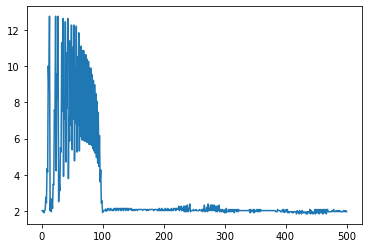

In [20]:
lr1.batch_train(0.01, 500)

# LR2

In [15]:
lr2 = LogReg(dataset = dataset, is_feature_engineered=1)

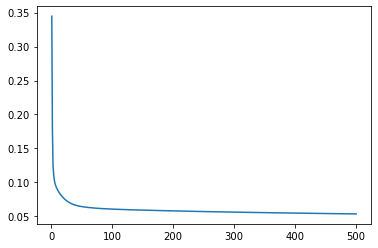

In [16]:
lr2.batch_train(0.01, 500)

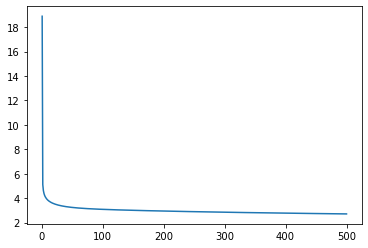

In [17]:
lr2.mini_batch_train(0.01, 500)

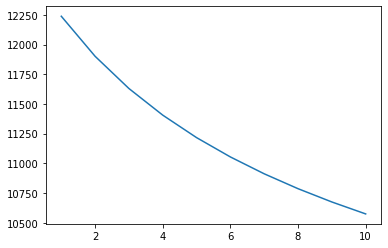

In [20]:
lr2.stochastic_train(0.01, 10)

In [ ]:
descent = ("Batch", "Mini-Batch", "Stochastic")
threshold = (0.5, 0.3, 0.4, 0.6, 0.7)
learning_rate = (0.01, 0.001, 0.0001)
lr2.run_all_permutations(descents = descent, thresholds = threshold, learning_rates = learning_rate, epochs = 500)